# Simple Analyse the Ronchi Data output from Beam4


- author : Sylvie Dagoret-Campagne
- affiliation : LAL
- date March 10th 2017



- Ronchi Grating R200


In [234]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [235]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Constants for conversions

In [236]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [237]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [238]:
deg_to_rad=np.pi/180.

In [239]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [240]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [241]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [242]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [243]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [244]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [245]:
order="O0"
order_str="0"

In [246]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [247]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{:d}_{:d}_{}.xlsx".format(NBTOT,theta_x_num,theta_y_num,order)

In [248]:
figname1="DISP_Beam4_Rayfile_{:d}_allwl_{:d}_{:d}_{}.png".format(NBTOT,theta_x_num,theta_y_num,order)
figname2="PSF_Beam4_Rayfile_{:d}_allwl_{:d}_{:d}_{}.png".format(NBTOT,theta_x_num,theta_y_num,order)

In [249]:
outputdata_excel="DISP_PSF_Beam4_Rayfile_{:d}_allwl_{:d}_{:d}_{}_out.xlsx".format(NBTOT,theta_x_num,theta_y_num,order)

In [250]:
rayfile=Beam4_Rayfile

In [251]:
input = pd.ExcelFile(rayfile)

In [252]:
sheet_name=input.sheet_names[0]

In [253]:
df_colname = input.parse(sheet_name,index_row=0,header=1,usecols=range(0,14))

In [254]:
df_colname.head()

,X0,Y0,Z0,U0,V0,W0,wave,WFE,Xgoal,Ygoal,Xfinal,Yfinal,Notes
0,---------------,---------------,---------------,---------------,---------------,---------------,-------------,-----------------,---------------,---------------,---------------,---------------,---------
1,-2.91379,-2.91379,0,0.0252377,0.0252377,0.999363,0.0004,-0.0440936,0,0,-0.0001483,-0.0001483,OK 3
2,-2.33103,-2.91379,0,0.0201925,0.0252406,0.999477,0.0004,-0.0308722,0,0,-0.0001177,-0.0001472,OK 3
3,-1.74827,-2.91379,0,0.0151457,0.0252429,0.999567,0.0004,-0.0205857,0,0,-8.78e-05,-0.0001463,OK 3
4,-1.16551,-2.91379,0,0.0100978,0.0252445,0.99963,0.0004,-0.0132365,0,0,-5.83e-05,-0.0001458,OK 3


In [255]:
df = input.parse(sheet_name,index_row=0,header=3,usecols=range(0,14))
#df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","col","WFE","Xgoal","Ygoal","Xfinal","Yfinal","Notes"]
df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","WFE","Xgoal","Ygoal","Xfinal","Yfinal","Notes"]

In [256]:
df.head()

,X0,Y0,Z0,U0,V0,W0,wave,WFE,Xgoal,Ygoal,Xfinal,Yfinal,Notes
0,-2.331028,-2.913785,0,0.020192,0.025241,0.999477,0.0004,-0.030872,0,0,-0.000118,-0.000147,OK 3
1,-1.748271,-2.913785,0,0.015146,0.025243,0.999567,0.0004,-0.020586,0,0,-0.000088,-0.000146,OK 3
2,-1.165514,-2.913785,0,0.010098,0.025244,0.999630,0.0004,-0.013236,0,0,-0.000058,-0.000146,OK 3
3,-0.582757,-2.913785,0,0.005049,0.025245,0.999669,0.0004,-0.008826,0,0,-0.000029,-0.000145,OK 3
4,0.000000,-2.913785,0,0.000000,0.025246,0.999681,0.0004,-0.007356,0,0,0.000000,-0.000145,OK 3


### Decoding

In [257]:
wave=df["wave"]

In [258]:
Xfinal=df["Xfinal"]
Yfinal=df["Yfinal"]

In [259]:
selected_indexes1=np.where(wave==0.0004)
selected_indexes2=np.where(wave==0.0006)
selected_indexes3=np.where(wave==0.0008)
selected_indexes4=np.where(wave==0.0010)

In [260]:
selected_indexes1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]),)

In [261]:
def GetInfo(a):
    a_av=np.average(a)
    a_rms=np.std(a)
    a_min=np.min(a)
    a_max=np.max(a)
    a_width=a_max-a_min
    return a_av,a_rms,a_min,a_max,a_width

In [262]:
x1=Xfinal[selected_indexes1[0]]
y1=Yfinal[selected_indexes1[0]]

In [263]:
x1av,x1std,x1min,x1max,x1wdt=GetInfo(x1)
y1av,y1std,y1min,y1max,y1wdt=GetInfo(y1)

In [264]:
x2=Xfinal[selected_indexes2[0]]
y2=Yfinal[selected_indexes2[0]]

In [265]:
x2av,x2std,x2min,x2max,x2wdt=GetInfo(x2)
y2av,y2std,y2min,y2max,y2wdt=GetInfo(y2)

In [266]:
x3=Xfinal[selected_indexes3[0]]
y3=Yfinal[selected_indexes3[0]]

In [267]:
x3av,x3std,x3min,x3max,x3wdt=GetInfo(x3)
y3av,y3std,y3min,y3max,y3wdt=GetInfo(y3)

In [268]:
x4=Xfinal[selected_indexes4[0]]
y4=Yfinal[selected_indexes4[0]]

In [269]:
x4av,x4std,x4min,x4max,x4wdt=GetInfo(x4)
y4av,y4std,y4min,y4max,y4wdt=GetInfo(y4)

In [270]:
xav=np.array([x1av,x2av,x3av,x4av])
xstd=np.array([x1std,x2std,x3std,x4std])
xmin=np.array([x1min,x2min,x3min,x4min])
xmax=np.array([x1max,x2max,x3max,x4max])
xwdt=np.array([x1wdt,x2wdt,x3wdt,x4wdt])
yav=np.array([y1av,y2av,y3av,y4av])
ystd=np.array([y1std,y2std,y3std,y4std])
ymin=np.array([y1min,y2min,y3min,y4min])
ymax=np.array([y1max,y2max,y3max,y4max])
ywdt=np.array([y1wdt,y2wdt,y3wdt,y4wdt])

In [271]:
dataout = {'xav': xav,'xstd' :xstd,'xmin' :xmin,'xmax' :xmax,'xwdt':xwdt,'yav': yav,'ystd' :ystd,'ymin' :ymin,'ymax' :ymax,'ywdt':ywdt}

In [272]:
df = pd.DataFrame(dataout, index = ['400nm', '600nm', '800nm', '1000nm'])

In [273]:
df.head()

,xav,xmax,xmin,xstd,xwdt,yav,ymax,ymin,ystd,ywdt
400nm,1.235833e-06,0.000148,-0.000148,0.000091,0.000297,1.235833e-06,0.000148,-0.000148,0.000091,0.000297
600nm,2.240087e-22,0.000148,-0.000148,0.000092,0.000297,-1.568061e-21,0.000148,-0.000148,0.000092,0.000297
800nm,2.240087e-22,0.000148,-0.000148,0.000092,0.000297,-1.568061e-21,0.000148,-0.000148,0.000092,0.000297
1000nm,2.240087e-22,0.000148,-0.000148,0.000092,0.000297,-1.568061e-21,0.000148,-0.000148,0.000092,0.000297


In [274]:
df.to_excel(outputdata_excel)

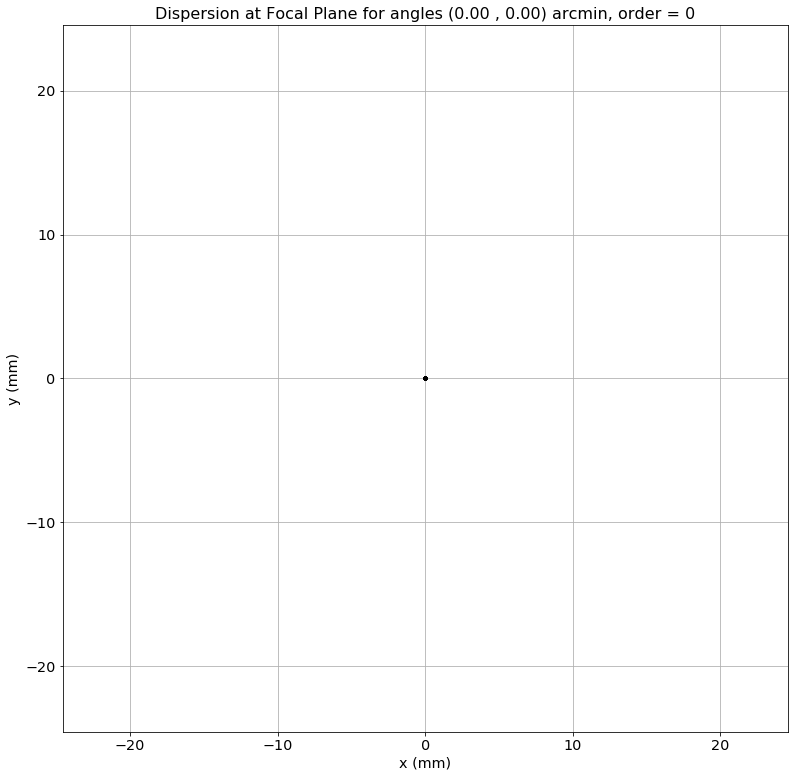

In [275]:
plt.plot(x1,y1,"b.")
plt.plot(x2,y2,"g.")
plt.plot(x3,y3,"r.")
plt.plot(x4,y4,"k.")
plt.xlim(-Det_size/2,Det_size/2.)
plt.ylim(-Det_size/2,Det_size/2)
plt.grid(True)
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
fulltitle="Dispersion at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
plt.title(fulltitle,fontsize=16)
plt.savefig(figname1)

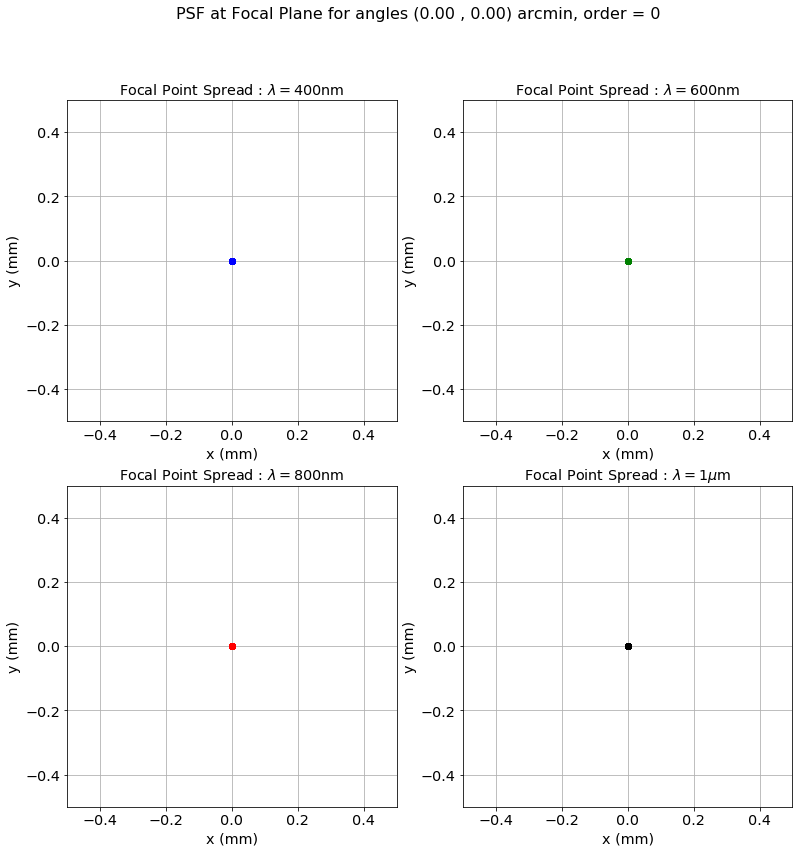

In [276]:
wdt=1.00  # with 100 microns
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(x1, y1,'bo')
ax1.set_xlim(x1av-wdt/2,x1av+wdt/2)
ax1.set_ylim(y1av-wdt/2,y1av+wdt/2)
ax1.set_title('Focal Point Spread : $\lambda=400$nm')
ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')
ax1.grid()
ax2.plot(x2, y2,'go')
ax2.set_xlim(x2av-wdt/2,x2av+wdt/2)
ax2.set_ylim(y2av-wdt/2,y2av+wdt/2)
ax2.set_xlabel('x (mm)')
ax2.set_ylabel('y (mm)')
ax2.grid()
ax2.set_title('Focal Point Spread : $\lambda=600$nm')
ax3.plot(x3, y3,'ro')
ax3.set_xlim(x3av-wdt/2,x3av+wdt/2)
ax3.set_ylim(y3av-wdt/2,y3av+wdt/2)
ax3.set_xlabel('x (mm)')
ax3.set_ylabel('y (mm)')
ax3.grid()
ax3.set_title('Focal Point Spread : $\lambda=800$nm')
ax4.plot(x4, y4,'ko')
ax4.set_xlim(x4av-wdt/2,x4av+wdt/2)
ax4.set_ylim(y4av-wdt/2,y4av+wdt/2)
ax4.set_xlabel('x (mm)')
ax4.set_ylabel('y (mm)')
ax4.grid()
ax4.set_title('Focal Point Spread : $\lambda=1\mu$m')
fulltitle="PSF at Focal Plane for file = {}".format(rayfile)
fulltitle="PSF at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
plt.suptitle(fulltitle,fontsize=16)
plt.savefig(figname2)